In [1]:
import os
import math
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Base de dados

In [2]:
dataset = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/BASES DE DADOS/BD_ML-e-DS-com-Python-de-A-a-Z/credit_data.csv')
dataset

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
dataset.shape

(2000, 5)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  1997 non-null   int64  
 1   income    1997 non-null   float64
 2   age       1997 non-null   float64
 3   loan      1997 non-null   float64
 4   default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


AED preliminar

In [7]:
dataset.describe()

,clientid,income,age,loan,default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.807559,4445.487716,0.141713
std,576.702206,14325.131177,13.624469,3046.792457,0.348842
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,503.000000,32804.904487,28.990415,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
dataset[dataset['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [9]:
dataset['age'] = dataset['age'].abs()

In [10]:
dataset.describe()

,clientid,income,age,loan,default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.924874,4445.487716,0.141713
std,576.702206,14325.131177,13.267741,3046.792457,0.348842
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,503.000000,32804.904487,29.033679,1936.813257,0.000000
50%,1002.000000,45788.747100,41.353171,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [11]:
# Se fosse eu, retiraria a coluna 'clientid'. Vou deixar para seguir a aula.

AED final

/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


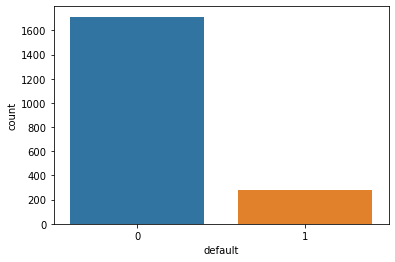

In [12]:
sns.countplot(dataset['default']);

In [13]:
np.unique(dataset['default'].values, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [14]:
1714/1997, 283/1997

(0.8582874311467201, 0.14171256885327993)

In [15]:
df = dataset.drop('clientid', 1)

/var/folders/7l/n994pw8s5t9_9kfwf_p6jjqw0000gn/T/ipykernel_14454/3771953151.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = dataset.drop('clientid', 1)


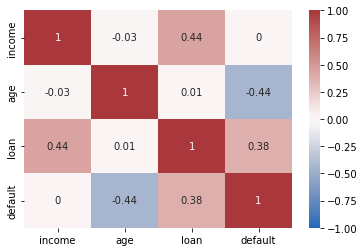

In [16]:
# Com números
matriz = df.corr().round(2)
sns.heatmap(matriz, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

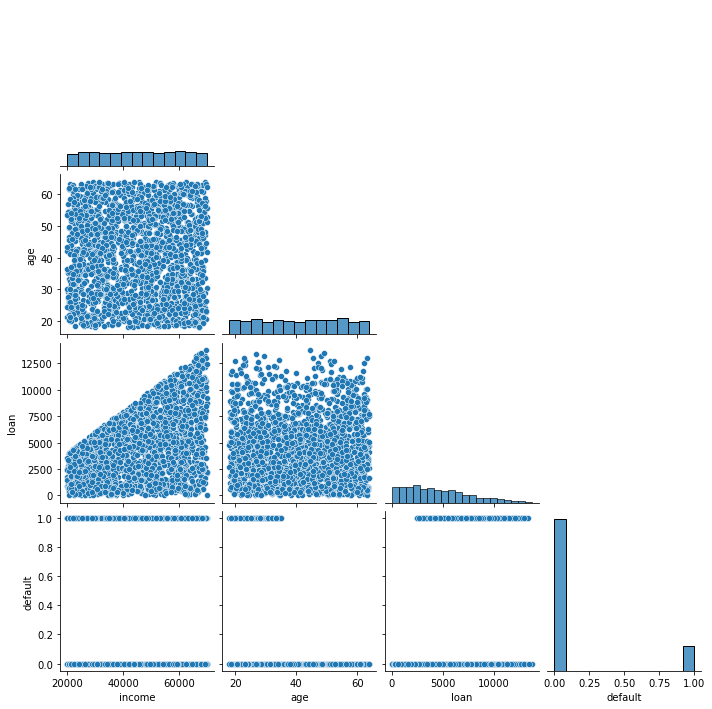

In [17]:
# Basic correlogram
sns.pairplot(df, kind='scatter', corner=True)
plt.show()

Separar variáveis

In [18]:
x = dataset.iloc[:, 1:4].values

In [19]:
x.shape

(1997, 3)

In [20]:
y = dataset.iloc[:, 4].values

In [21]:
y.shape

(1997,)

Treinamento e teste

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.2, stratify=y)

In [24]:
x_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [25]:
x_teste.shape, y_teste.shape

((400, 3), (400,))

In [26]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [27]:
1371/1597, 226/1597

(0.8584846587351284, 0.14151534126487164)

In [28]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [29]:
343/400, 57/400

(0.8575, 0.1425)

Classificacao com Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
modelo = GaussianNB()

In [32]:
modelo.fit(x_treinamento, y_treinamento)

GaussianNB()

In [33]:
previsoes = modelo.predict(x_teste)

In [34]:
previsoes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [35]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(previsoes, y_teste)

0.92

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[337,  26],
       [  6,  31]])

<AxesSubplot:>

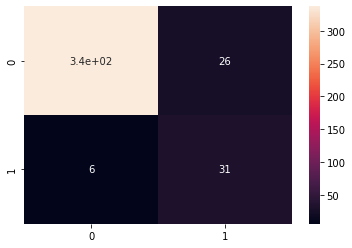

In [40]:
sns.heatmap(cm, annot=True)

In [41]:
# De forma manual

In [42]:
# Total de acertos (acurácia)
(337+36) / (337+21+6+36)

0.9325

In [43]:
# % acerto de pessoas que pagam o empréstimo (0)
337 / (337+21)

0.9413407821229051

In [44]:
# % acerto de pessoas que não pagam o empréstimo (1)
36 / (6+36)

0.8571428571428571

In [45]:
# O % de acerto para quem paga (94%) é maior do que para quem não paga (86%), e isto geralmente é causado por dados desbalanceados. Lembre-se que o % no dataset de quem pagou (86%) era bem maior do que quem deu calote (14%).

In [46]:
# De forma automática

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       343
           1       0.84      0.54      0.66        57

    accuracy                           0.92       400
   macro avg       0.88      0.76      0.81       400
weighted avg       0.92      0.92      0.91       400



Subamostragem

In [49]:
np.unique(dataset['default'].values, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [50]:
1714/1997, 283/1997

(0.8582874311467201, 0.14171256885327993)

In [55]:
from imblearn.under_sampling import TomekLinks

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/sklearn/utils/__init__.py)

In [ ]:
tl = TomekLinks(return_indices=True, ratio='majority')

In [ ]:
x_under, y_under, id_under = tl.fit_sample(x, y)

In [ ]:
x_under.shape, y_under.shape

In [ ]:
np.unique(y_under, return_counts=True)

In [ ]:
y_treinamento_u = y_treinamento_u.reshape(-1,1)
y_treinamento_u = y_treinamento_u.astype('int')

In [ ]:
# Com os dados balanceados, passemos ao treinamento e teste do modelo
x_treinamento_u, y_treinamento_u, x_teste_u, y_teste_u = train_test_split(x_under, y_under, test_size=0.2, stratify=y_under)

In [ ]:
modelo_u = GaussianNB()

In [ ]:
x_treinamento_u.shape, y_treinamento_u.shape

In [ ]:
modelo_u.fit(x_treinamento_u, y_treinamento_u)